# 국가별 넷플릭스 요금제 가격과 보유하고 있는 콘텐츠 수 (2021년 기준)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix = pd.read_csv('netflix.csv')
sns.set_palette('pastel')
netflix

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48
62,us,United States,5818,3826,1992,8.99,13.99,17.99
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99


In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.2+ KB


In [4]:
netflix.isnull().sum()

Country_code                     0
Country                          0
Total Library Size               0
No. of TV Shows                  0
No. of Movies                    0
Cost Per Month - Basic ($)       0
Cost Per Month - Standard ($)    0
Cost Per Month - Premium ($)     0
dtype: int64

In [5]:
netflix2 = netflix.copy()

In [6]:
netflix2.drop(columns = ['Country_code','Cost Per Month - Basic ($)','Cost Per Month - Standard ($)'])

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,9.26
1,Australia,6114,4050,2064,16.39
2,Austria,5640,3779,1861,20.32
3,Belgium,4990,3374,1616,20.32
4,Bolivia,4991,3155,1836,13.99
...,...,...,...,...,...
60,Ukraine,5336,3261,2075,11.29
61,United Kingdom,6643,4551,2092,18.48
62,United States,5818,3826,1992,17.99
63,Uruguay,4989,3154,1835,15.99


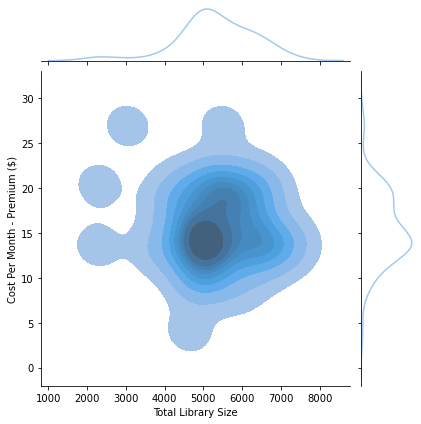

In [7]:
sns.jointplot(x='Total Library Size', y='Cost Per Month - Premium ($)', data=netflix2, kind = 'kde', shade = 'True')

(0.0, 30.0)

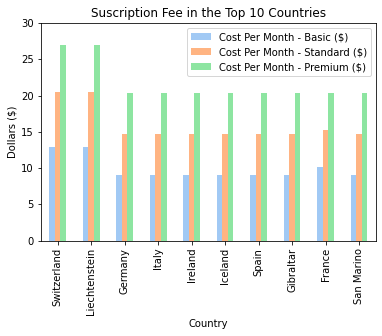

In [9]:
netflix3 = netflix2.sort_values("Cost Per Month - Premium ($)", ascending = False)
netflix4 = netflix3.head(10)
netflix4.plot(x = "Country", y = ["Cost Per Month - Basic ($)","Cost Per Month - Standard ($)","Cost Per Month - Premium ($)"], kind = "bar")
plt.title("Suscription Fee in the Top 10 Countries")
plt.ylabel("Dollars ($)")
plt.ylim(0,30)

(0.0, 30.0)

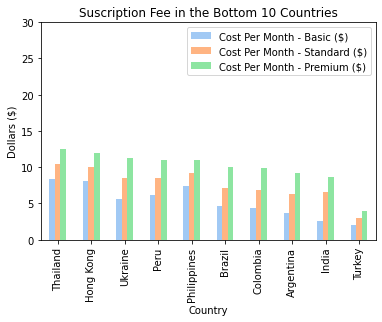

In [10]:
netflix5 = netflix2.sort_values('Cost Per Month - Premium ($)', ascending = False)
netflix6 = netflix5.tail(10)
netflix6.plot(x = 'Country', y = ['Cost Per Month - Basic ($)','Cost Per Month - Standard ($)','Cost Per Month - Premium ($)'], kind = 'bar')
plt.title("Suscription Fee in the Bottom 10 Countries")
plt.ylabel("Dollars ($)")
plt.ylim(0,30)

(0.0, 8000.0)

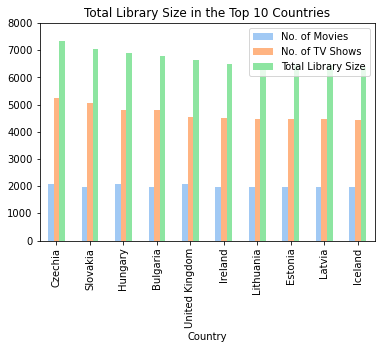

In [11]:
netflix7 = netflix2.sort_values('Total Library Size', ascending = False)
netflix8 = netflix7.head(10)
netflix8.plot(x = 'Country', y = ['No. of Movies','No. of TV Shows','Total Library Size'], kind = 'bar')
plt.title("Total Library Size in the Top 10 Countries")
plt.ylim(0,8000)

(0.0, 8000.0)

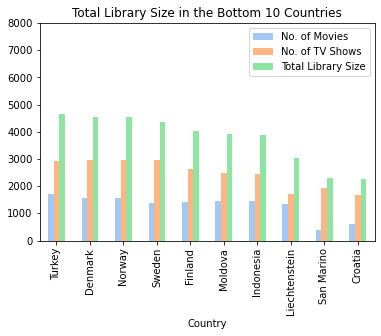

In [12]:
netflix9 = netflix2.sort_values('Total Library Size', ascending = False)
netflix10 = netflix9.tail(10)
netflix10.plot(x = 'Country', y = ['No. of Movies','No. of TV Shows','Total Library Size'], kind = 'bar')
plt.title("Total Library Size in the Bottom 10 Countries")
plt.ylim(0,8000)